In [4]:
# Name - Rutvik Joshi
# Predicting using unsupervised learning - KMeans

In [1]:
# Necessary Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans

In [5]:
# Loading the dataset
datafile = pd.read_csv("./iris.csv")
datafile.info()
set(datafile['Species'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


{'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'}

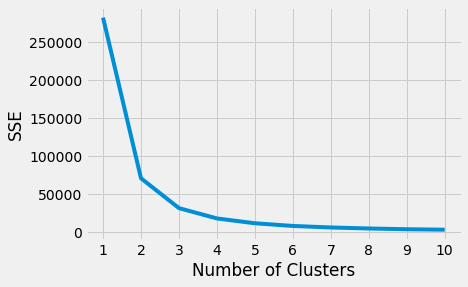

In [7]:
kmeans_kwargs = {
    "init": "k-means++",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 0,
 }

# A list holds the SSE values for each k
optimum_no = datafile.iloc[:, [0, 1, 2, 3]].values
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(optimum_no)
    sse.append(kmeans.inertia_)


# Plotting
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [9]:
# Finding clusters and fitting.
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
test_kmeans = kmeans.fit_predict(optimum_no)

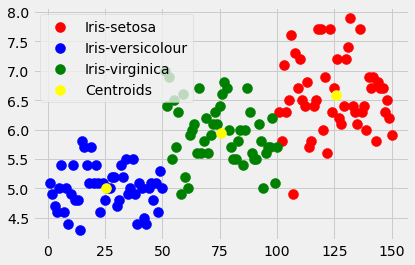

In [14]:
plt.scatter(optimum_no[test_kmeans == 0, 0], optimum_no[test_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(optimum_no[test_kmeans == 1, 0], optimum_no[test_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(optimum_no[test_kmeans == 2, 0], optimum_no[test_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()